In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import seaborn as sns

In [83]:
d_match = pd.read_csv("matches.csv") #ipl data set
d_del = pd.read_csv("/home/adarsh/PycharmProjects/ml workspace/deliveries.csv") #delivery

In [84]:

m_data=d_match.merge(d_del, left_on="id",right_on="match_id")

In [85]:
m_data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [86]:
S_data=m_data.groupby(["season","batsman"])

In [87]:
All_scData=S_data["batsman_runs"].sum()

In [88]:
All_scData.sort_values(ascending=False,inplace=True)

In [130]:
FG_data=(All_scData.reset_index()).drop_duplicates(subset="season",keep="first")
FG_data.sort_values('season',inplace=True)
FG_data

,index,season,batsman,batsman_runs
6,10,2008,SE Marsh,616
8,13,2009,ML Hayden,572
5,9,2010,SR Tendulkar,618
7,11,2011,CH Gayle,608
1,2,2012,CH Gayle,733
2,3,2013,MEK Hussey,733
3,6,2014,RV Uthappa,660
9,17,2015,DA Warner,562
0,0,2016,V Kohli,973
4,7,2017,DA Warner,641


In [128]:
Prev_data=FG_data[["season","batsman"]]

Text(0, 0.5, 'Seasonal Scores')

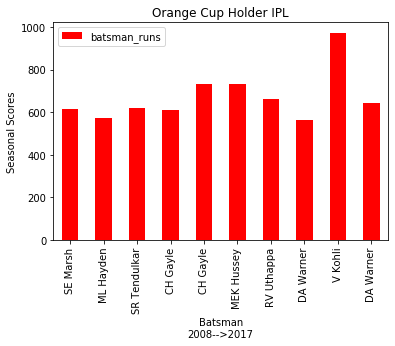

In [133]:
#graph using matplotlib

FG_data.plot(kind="bar",x="batsman",y="batsman_runs",color="red",title="Orange Cup Holder IPL")
plt.xlabel("Batsman\n2008-->2017")
plt.ylabel("Seasonal Scores")

In [134]:
#graph using plotly
trace=go.Bar(x=FG_data["batsman"],y=FG_data["batsman_runs"],text=FG_data["season"])
data=[trace]

layout=go.Layout(title='Orange Cup Holder IPl',
                xaxis={'title':'Batsman'},
                yaxis={'title':'Seasonal Scores'})
fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)



'temp-plot.html'

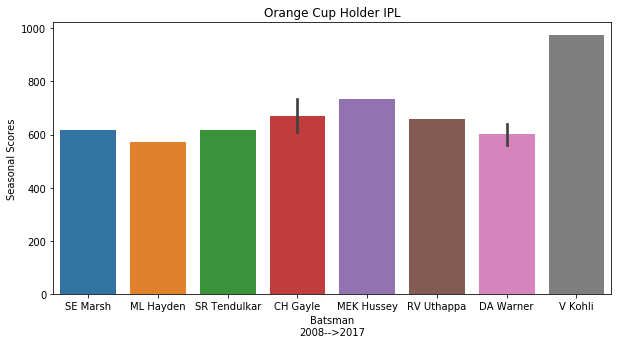

In [138]:
#seaborn
plt.figure(figsize=(10,5))
sns.barplot(data=FG_data,x='batsman',y='batsman_runs')
plt.xlabel('Batsman\n2008-->2017')
plt.ylabel('Seasonal Scores')
plt.title('Orange Cup Holder IPL')
plt.show()